```{=html}
<iframe class="slide-deck" style="border:1px solid lightgray;" width="100%" height="500" src="presentation.html"></iframe>
```


[Presentation in standalone browser tab.](presentation.html){.internal target="_blank"}

# Executive Summary

 # Introduction

# Data Source
we used a data set from the website of Times Higher Education, we got the data from Json on the site and cleaned the data because some columns did not have data or some rows had N/A.



In [8]:
#| include: false
import pandas as pd
import numpy as np

from pandas.core.tools.numeric import to_numeric
import geopandas as gpd
import plotly as px
import plotly.express as px # for interactive plots
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.feature_selection import VarianceThreshold
import os
import warnings
warnings.filterwarnings("ignore")

In [9]:
#| label: data-import
df = pd.read_csv('data\data200.csv')
df.head() 

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled
0,10,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,...,468,United Kingdom,"21,750",10.9,42%,49:51:00,23%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False
1,20,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,...,467,United States,"14,517",6.4,23%,47:53:00,22%,Stanford University,"Computer Science,Communication & Media Studies...",False
2,30,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,...,471,United States,"11,085",8.0,33%,41:59:00,40%,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False
3,40,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,...,466,United States,"20,050",9.0,25%,51:49:00,12%,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False
4,50,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,...,470,United Kingdom,"20,565",11.5,38%,48:52:00,27%,University of Cambridge,Politics & International Studies (incl Develop...,False


In [10]:



def clean_and_convert(value):
    try:
      
        if ':' in value:
            parts = value.split(':')
            if len(parts) == 3:  
                value = ':'.join(parts[:2])  

    
        if ':' in value:
            female, male = map(int, value.split(':'))
            return round((female / (female + male)) * 100, 2)  
        else:
            
            return round(float(value) * 100, 2)
    except:
        return None  

df['female_percentage'] = df['stats_female_male_ratio'].apply(clean_and_convert)
print(df)

     rank_order  rank                                               name  \
0            10     1                               University of Oxford   
1            20     2                                Stanford University   
2            30     3              Massachusetts Institute of Technology   
3            40     4                                 Harvard University   
4            50     5                            University of Cambridge   
..          ...   ...                                                ...   
196        1970   193                                     Ulm University   
197        1980   198                                 Indiana University   
198        1990   199                           University of Notre Dame   
199        2000   199                Queensland University of Technology   
200        2010   199  Ulsan National Institute of Science and Techno...   

     scores_overall  scores_overall_rank  scores_teaching  \
0              98.5       

In [11]:
#| label: show how many rows and coloumn in data set
df.shape

(201, 28)

With this function, we check all culmns and their type

In [12]:
#| label: Get informaion
# getting data on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         201 non-null    int64  
 1   rank                               201 non-null    int64  
 2   name                               201 non-null    object 
 3   scores_overall                     201 non-null    float64
 4   scores_overall_rank                201 non-null    int64  
 5   scores_teaching                    201 non-null    float64
 6   scores_teaching_rank               201 non-null    int64  
 7   scores_research                    201 non-null    float64
 8   scores_research_rank               201 non-null    int64  
 9   scores_citations                   201 non-null    float64
 10  scores_citations_rank              201 non-null    int64  
 11  scores_industry_income             201 non-null    float64

In [13]:
df = pd.DataFrame(df)


reporter_rows = df[df['rank'] == 'Reporter']

if not reporter_rows.empty:
    
    index_to_drop = reporter_rows.index[0]
    
    
    df = df.iloc[:index_to_drop]

print(df)


     rank_order  rank                                               name  \
0            10     1                               University of Oxford   
1            20     2                                Stanford University   
2            30     3              Massachusetts Institute of Technology   
3            40     4                                 Harvard University   
4            50     5                            University of Cambridge   
..          ...   ...                                                ...   
196        1970   193                                     Ulm University   
197        1980   198                                 Indiana University   
198        1990   199                           University of Notre Dame   
199        2000   199                Queensland University of Technology   
200        2010   199  Ulsan National Institute of Science and Techno...   

     scores_overall  scores_overall_rank  scores_teaching  \
0              98.5       

In [14]:
df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled,female_percentage
0,10,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,...,United Kingdom,"21,750",10.9,42%,49:51:00,23%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,49.0
1,20,2,Stanford University,98.0,20,99.0,1,97.8,8,99.6,...,United States,"14,517",6.4,23%,47:53:00,22%,Stanford University,"Computer Science,Communication & Media Studies...",False,47.0
2,30,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,...,United States,"11,085",8.0,33%,41:59:00,40%,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,41.0
3,40,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,...,United States,"20,050",9.0,25%,51:49:00,12%,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,51.0
4,50,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,...,United Kingdom,"20,565",11.5,38%,48:52:00,27%,University of Cambridge,Politics & International Studies (incl Develop...,False,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1970,193,Ulm University,59.0,1970,40.6,292,41.2,233,87.9,...,Germany,"10,301",26.4,13%,51:49:00,24%,Ulm University,"Other Health,Electrical & Electronic Engineeri...",False,51.0
197,1980,198,Indiana University,58.9,1980,47.3,170,38.4,273,84.9,...,United States,"66,389",12.3,12%,54:46:00,24%,Indiana University,"Mechanical & Aerospace Engineering,Physics & A...",False,54.0
198,1990,199,University of Notre Dame,58.7,1990,51.9,118,42.6,215,76.1,...,United States,"12,576",10.9,12%,47:53:00,36%,University of Notre Dame,"Civil Engineering,Psychology,Biological Scienc...",False,47.0
199,2000,199,Queensland University of Technology,58.7,2000,33.9,499,42.1,225,89.5,...,Australia,"35,164",37.9,14%,54:46:00,28%,Queensland University of Technology qut,"Other Health,Psychology,Art, Performing Arts &...",False,54.0


Each column in the dataset represents a specific feature or indicator related to the performance and characteristics of universities. Here's what each column signifies:

### 1. **`rank_order`**
   - **Description:** Indicates the ranking order of universities in this list.
   - **Meaning:** The rank number based on the overall position of the university.

### 2. **`rank`**
   - **Description:** The overall global rank of the university.
   - **Meaning:** The rank of the university based on final evaluation across various metrics.

### 3. **`name`**
   - **Description:** Name of the university.
   - **Meaning:** The name of the educational institution included in this ranking.

### 4. **`scores_overall`**
   - **Description:** The overall score of the university based on all criteria.
   - **Meaning:** The final score reflecting the university's overall performance.

### 5. **`scores_overall_rank`**
   - **Description:** The rank of the university based on the overall score.
   - **Meaning:** The rank of the university according to its overall score.

### 6. **`scores_teaching`**
   - **Description:** The university's score for teaching.
   - **Meaning:** The performance of the university in terms of teaching quality and educational impact.

### 7. **`scores_teaching_rank`**
   - **Description:** The rank of the university based on teaching score.
   - **Meaning:** The position of the university in the teaching metric.

### 8. **`scores_research`**
   - **Description:** The university's score for research.
   - **Meaning:** The performance of the university in research, publication output, and scientific contributions.

### 9. **`scores_research_rank`**
   - **Description:** The rank of the university based on research score.
   - **Meaning:** The university's rank in the research metric.

### 10. **`scores_citations`**
   - **Description:** The university's score based on the number of citations.
   - **Meaning:** Reflects the impact and influence of the university's research work.

### 11. **`scores_citations_rank`**
   - **Description:** The rank of the university based on citation score.
   - **Meaning:** The university's rank in the citation impact metric.

### 12. **`scores_industry_income`**
   - **Description:** The university's score based on income generated from industry.
   - **Meaning:** Indicates the university's ability to generate revenue through industry collaborations.

### 13. **`scores_industry_income_rank`**
   - **Description:** The rank of the university based on industry income.
   - **Meaning:** The university's position in the industry income metric.

### 14. **`scores_international_outlook`**
   - **Description:** The university's score based on international outlook.
   - **Meaning:** Represents the university’s global engagement and international reputation.

### 15. **`scores_international_outlook_rank`**
   - **Description:** The rank of the university based on international outlook score.
   - **Meaning:** The university’s position in the international outlook metric.

### 16. **`record_type`**
   - **Description:** Type of university institution (e.g., private, public, or master account).
   - **Meaning:** Indicates the management type and structure of the institution.

### 17. **`member_level`**
   - **Description:** The membership level of the university in a specific organization or ranking.
   - **Meaning:** Represents a special membership or level of interaction with ranking bodies.

### 18. **`nid`**
   - **Description:** Unique identifier for the university.
   - **Meaning:** A unique ID used to identify the university within the system.

### 19. **`location`**
   - **Description:** The country or region where the university is located.
   - **Meaning:** The geographical location of the university.

### 20. **`stats_number_students`**
   - **Description:** Total number of students enrolled at the university.
   - **Meaning:** The student population at the university.

### 21. **`stats_student_staff_ratio`**
   - **Description:** Ratio of students to staff.
   - **Meaning:** Reflects the student-to-teacher ratio, indicating educational quality.

### 22. **`stats_pc_intl_students`**
   - **Description:** Percentage of international students.
   - **Meaning:** Indicates the proportion of non-domestic students at the university.

### 23. **`stats_female_male_ratio`**
   - **Description:** Ratio of female to male students.
   - **Meaning:** Represents the gender distribution among students.

### 24. **`stats_proportion_of_isr`**
   - **Description:** Percentage of international staff.
   - **Meaning:** Reflects the participation of non-domestic academic staff.

### 25. **`aliases`**
   - **Description:** Other names or aliases of the university.
   - **Meaning:** Alternative names or short forms used to refer to the university.

### 26. **`subjects_offered`**
   - **Description:** Subjects and fields of study offered by the university.
   - **Meaning:** A list of disciplines and programs available at the university.

### 27. **`disabled`**
   - **Description:** Indicates whether the university is inactive or closed.
   - **Meaning:** Specifies whether the university is currently active (`FALSE` means active, `TRUE` means inactive).



## 4. Data Pre-processing

This process is beneficial for several reasons. Reducing dimensionality, improving computational efficiency and enhancing model performance.
In the pre-processing step, dimension reduction, outlier detection and missing value handling were conducted.

### 4.1. Dropping unnecessary columns and rows:
Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. 
 We selected the best columns using the feature selection algorithm and we will obtain the accuracy of the model before and after that.


#### 4.2. Checking missing values
In most cases, we do not get complete datasets. They either have some missing values in the rows and columns. However, fortunately, we check whether the dataset has any missing values or not, and as you can see in the output of the block below, there is no missing value in this dataset

In [15]:
df =df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 200
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         174 non-null    int64  
 1   rank                               174 non-null    int64  
 2   name                               174 non-null    object 
 3   scores_overall                     174 non-null    float64
 4   scores_overall_rank                174 non-null    int64  
 5   scores_teaching                    174 non-null    float64
 6   scores_teaching_rank               174 non-null    int64  
 7   scores_research                    174 non-null    float64
 8   scores_research_rank               174 non-null    int64  
 9   scores_citations                   174 non-null    float64
 10  scores_citations_rank              174 non-null    int64  
 11  scores_industry_income             174 non-null    float64
 12 

In [16]:
# Checking for missing values in the entire dataset
df.isnull().sum()

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
record_type                          0
member_level                         0
nid                                  0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_male_ratio              0
stats_proportion_of_isr              0
aliases                              0
subjects_offered         

In [14]:
df.notnull()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled,female_percentage
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
197,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
198,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
199,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


#### 	4.3 Checking for garbage values
Garbage value is generally a term meaning that the value in a variable which means nothing.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:
 *** Negative Values and Ziro for deleting ***
 Using this code, we check the data for minus and zero values if they are not compatible by the meaning they have.

In [17]:
# get name the columns
df.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio',
       'stats_proportion_of_isr', 'aliases', 'subjects_offered', 'disabled',
       'female_percentage'],
      dtype='object')

In [18]:
print(df.value_counts())

rank_order  rank  name                                                        scores_overall  scores_overall_rank  scores_teaching  scores_teaching_rank  scores_research  scores_research_rank  scores_citations  scores_citations_rank  scores_industry_income  scores_industry_income_rank  scores_international_outlook  scores_international_outlook_rank  record_type     member_level  nid     location        stats_number_students  stats_student_staff_ratio  stats_pc_intl_students  stats_female_male_ratio  stats_proportion_of_isr  aliases                                                     subjects_offered                                                                                                                                                                                                                                                                                                                                                                                                          

### 4.4 Checking the distribution of each variable 
Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in the dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.
.

In [19]:
df = df.drop(columns=['rank_order'])


In [20]:
df = df.drop(columns=['nid'])


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,174.0,99.339080,57.565394,1.0,48.250,99.00,146.500,199.00
scores_overall,174.0,70.527011,10.659952,58.7,62.425,66.70,76.225,98.50
scores_overall_rank,174.0,997.068966,578.867767,10.0,482.500,995.00,1465.000,2010.00
scores_teaching,174.0,57.355747,15.965499,33.5,46.100,52.95,65.900,99.00
scores_teaching_rank,174.0,137.672414,109.742956,1.0,54.250,112.50,185.500,519.00
scores_research,174.0,60.974138,17.022470,35.0,47.325,56.75,73.100,100.00
scores_research_rank,174.0,111.833333,74.600368,1.0,50.250,102.50,162.750,350.00
scores_citations,174.0,88.366092,9.644840,33.9,85.025,90.40,94.675,99.70
scores_citations_rank,174.0,171.620690,194.966500,1.0,50.250,119.00,209.750,1354.00
scores_industry_income,174.0,86.918391,12.890603,34.9,76.100,91.00,99.400,100.00


Now, we check the categorical variables and their categories to show the frequency of each values.

Histograms are useful for analyzing the frequency distribution of different values for each variable. In each histogram, the horizontal axis represents the variable values, and the vertical axis indicates the frequency or the number of times each value appears in the data. The height of each column reflects the frequency or the number of samples with a specific value in that interval.

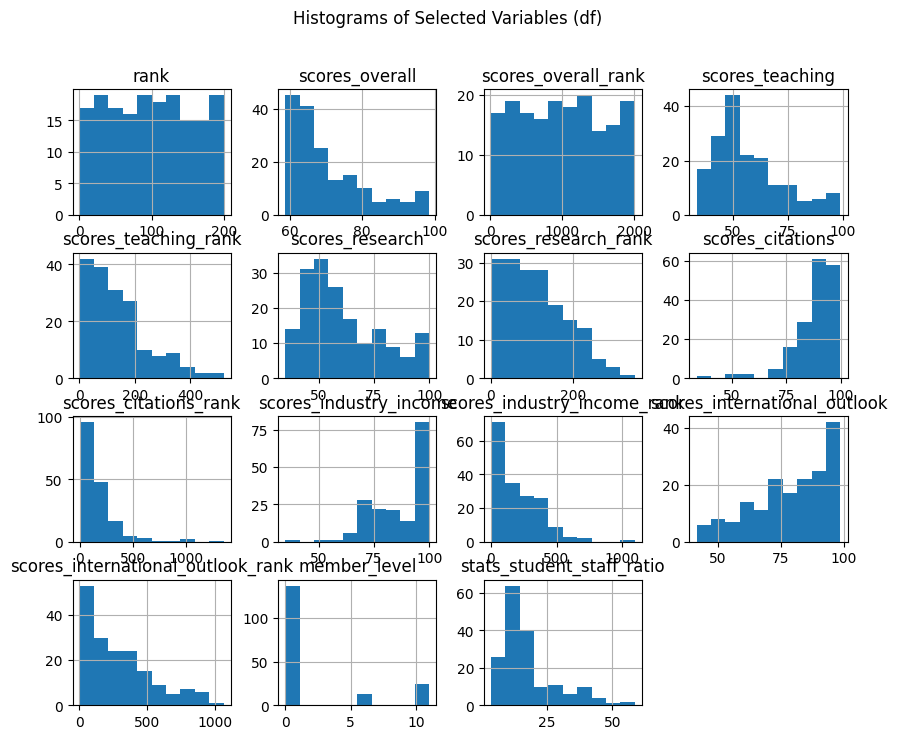

In [23]:
# Specify the columns you want to include in the analysis - df
selected_columns_df = [ 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio',
       'stats_proportion_of_isr', 'aliases', 'subjects_offered']

# Create a DataFrame containing only the selected columns
selected_df = df[selected_columns_df]

# Plot histograms for each variable
selected_df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables (df)')
plt.show()

In [24]:
# Displaying some statistics about categorical data
dataframes = {'dfRankingUni': df,}

for name, df in dataframes.items():
    print(f"DataFrame {name} - Summary statistics for object-type columns:")
    print(df.describe(include='object'))

DataFrame dfRankingUni - Summary statistics for object-type columns:
                        name     record_type       location  \
count                    174             174            174   
unique                   174               3             27   
top     University of Oxford  master_account  United States   
freq                       1             122             53   

       stats_number_students stats_pc_intl_students stats_female_male_ratio  \
count                    174                    174                     174   
unique                   174                     51                      39   
top                   21,750                    17%                56:44:00   
freq                       1                     10                      16   

       stats_proportion_of_isr               aliases  \
count                      174                   174   
unique                      43                   174   
top                        22%  University of Oxfor

### 4.5 Data Transformation

#### 4.5.1 Transforming the categorical variables
In this step, we numerized object variables 
If we have a column that is object or if we have Boolean, we can convert them to integer.

In [25]:
df.describe()
df.describe(include='object')

,name,record_type,location,stats_number_students,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered
count,174,174,174,174,174,174,174,174,174
unique,174,3,27,174,51,39,43,174,174
top,University of Oxford,master_account,United States,"21,750",17%,56:44:00,22%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo..."
freq,1,122,53,1,10,16,12,1,1


#### 4.5.2 Normalization, standardization, scaling
The data normalization process lowers the scale and brings all the data-points on the same scale.
Normalization involves scaling the values of a variable to a specific range, usually between 0 and 1. Scaling is a general term for any transformation that alters the range of the data.
Standardization (Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1. we use scaling in the model selection section.

## 5 Data Exploration

We put our visualization here.

### 5.1 Finding outliers , dummy variable

 Using of outlier detection methods depends on the type of data and the aim of analysis. However, generally, these methods are commonly applied to numerical and continuous variables. The reason for this is that the concept of outlier detection is more definable in continuous variables, and statistical measures such as mean, standard deviation, box plots, can easily be employed for detecting them.
For detecting outliers of discrete and categorical variables, we need to find whether types of variables are integer or objects. We find the outliers, the Q1, Q3 and compare it with data and count how much of each independent variable out of this range and then recognize them .
For each integer variable, we use boxplot and histogram for visualization. 
The plots for each variables are as follows:
Box plot is oneof best chart to show distribution of data points.
As the plot shows below, 

In [26]:
df.columns

Index(['rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'location', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'stats_proportion_of_isr', 'aliases',
       'subjects_offered', 'disabled', 'female_percentage'],
      dtype='object')

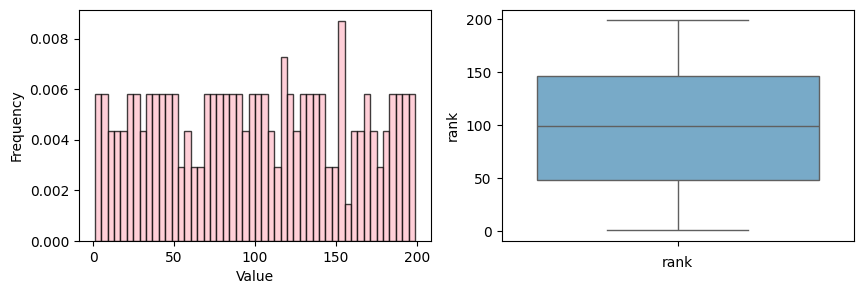

In [27]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(df['rank']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='rank', data=df,palette="Blues")
plt.xlabel('rank')
plt.show()

In [28]:
#calculate IQR and show thw outliers
Q1 = df['rank'].quantile(0.25)
Q3 = df['rank'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_rank = (df['rank'] < Q1 - 1.5 * IQR) | (df['rank'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_rank  = df.loc[outliers_rank, 'rank']
# Display the outlier values
print("df :", outliers_rank)

Q1: 48.25
Q3: 146.5
IQR: 98.25
Out1: -99.125
Out2: 293.875
df : Series([], Name: rank, dtype: int64)


In [29]:
int_df = df.select_dtypes(include='integer')
int_df.columns

Index(['rank', 'scores_overall_rank', 'scores_teaching_rank',
       'scores_research_rank', 'scores_citations_rank',
       'scores_industry_income_rank', 'scores_international_outlook_rank',
       'member_level'],
      dtype='object')

In [30]:
# Checking the linear correlation of variables
int_df=int_df[['rank', 'scores_overall_rank', 'scores_teaching_rank',
       'scores_research_rank', 'scores_citations_rank',
       'scores_industry_income_rank', 'scores_international_outlook_rank',
       'member_level']]
corr_matrix = int_df.corr()
corr_matrix['rank'].sort_values(ascending = False)

rank                                 1.000000
scores_overall_rank                  0.999918
scores_research_rank                 0.879143
scores_teaching_rank                 0.730900
scores_citations_rank                0.353441
scores_industry_income_rank          0.286752
scores_international_outlook_rank    0.278191
member_level                         0.112770
Name: rank, dtype: float64

<Axes: >

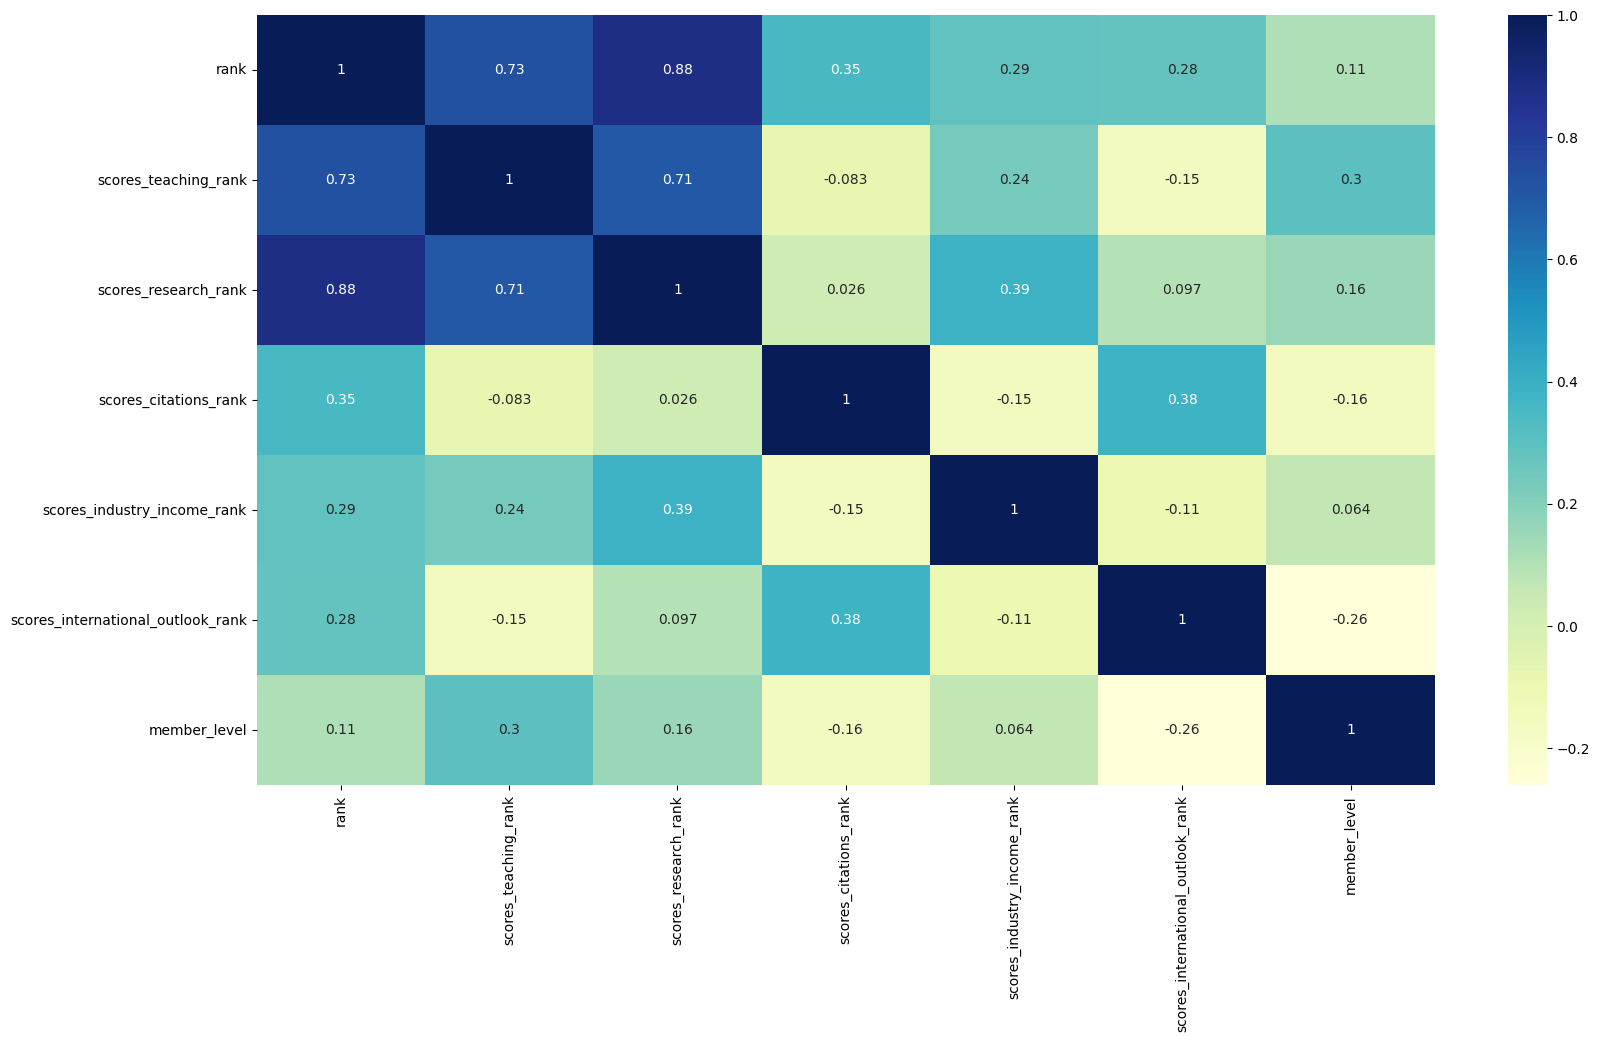

In [32]:
#| label: Get correlation visually1
plt.figure(figsize = (19,10))
sns.heatmap(int_df[['rank', 'scores_teaching_rank',
       'scores_research_rank', 'scores_citations_rank',
       'scores_industry_income_rank', 'scores_international_outlook_rank',
       'member_level'
       ]].corr(), cmap="YlGnBu",
            annot=True)